### Types of initializations:
- Zero or Constant initialization
- Random
- He  
- Xavier (GlorotUniform)

In [230]:
import numpy as np
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import utils as ut
import pandas as pd
from keras.optimizers import SGD

In [231]:
#trainX, trainy, testX, testy = ut.create_dataset(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)
trainX, trainy, testX, testy = ut.create_dataset(n_samples=1000, centers=2, n_features=2, cluster_std=2, random_state=2)
n_input, n_classes = trainX.shape[1], testy.shape[1]
print(f'Num of inputs: {n_input}, Num of classes: {n_classes}') 

Num of inputs: 2, Num of classes: 2


In [232]:
## kernel_initializer is for weights, deafault is Glorot initiialization
## bias_initializer is for bias default is 0

In [233]:
## He-initialization: sqrt(1/layers_dim[l-1])
## Xavier-initialization: sqrt(2/layers_dim[l-1])

In [234]:
def evaluate_model(trainX, trainy, testX, testy, activation, initialization):
    model = tf.keras.Sequential()
    model.add(layers.Dense(5, activation=activation, name='layer-0', kernel_initializer=initialization, input_shape=(n_input,)))
    model.add(layers.Dense(5, activation=activation, name='layer-1', kernel_initializer=initialization, input_shape=(n_input,)))            
    # model.add(layers.Dense(5, activation=activation, name='layer-112', kernel_initializer=initialization, input_shape=(n_input,)))            
    # model.add(layers.Dense(5, activation=activation, name='layer-21', kernel_initializer=initialization, input_shape=(n_input,)))            
    # model.add(layers.Dense(5, activation=activation, name='layer-121', kernel_initializer=initialization, input_shape=(n_input,)))            

    # model.add(layers.Dense(5, activation=activation, name='layer-12', kernel_initializer=initialization, input_shape=(n_input,)))            
    model.add(layers.Dense(n_classes, activation='softmax', name='layer-2'))
        
    model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(trainX, trainy, epochs=100, verbose=0)
    loss_val_train, train_acc = model.evaluate(trainX, trainy, verbose=0)    
    loss_val, test_acc = model.evaluate(testX, testy, verbose=0)
    print(f'{initialization} - Train Accuracy: {train_acc, loss_val_train}')
    #print(f'{initialization} - Test Accuracy: {test_acc, loss_val}')
    
    return history, test_acc, model

In [235]:
## symmetry is broken as long as weights are initialized by random, bias can still have thei rdefault values of zeroes

In [236]:
# tf.keras.initializers.RandomNormal(mean=1, stddev=0.05, seed=2): when you make mean closer to 1 or more 
# the costs starts large and when you get it wrong log(0) goes to infinity

<keras.initializers.initializers_v2.Zeros object at 0x1684869e0> - Train Accuracy: (0.5080000162124634, 0.693019688129425)


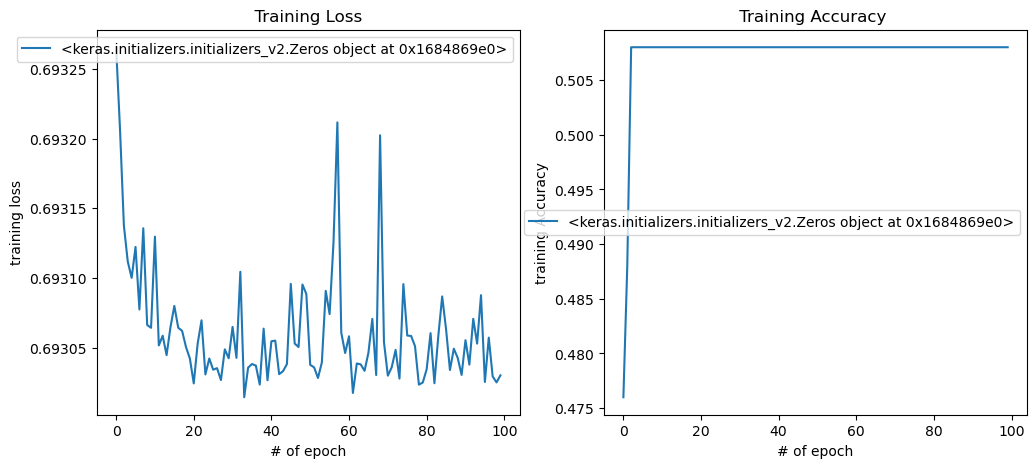

In [237]:
#,tf.keras.initializers.Constant( 1,)
plt.figure(figsize=(12,5))
activation = 'relu'
initialization = [tf.keras.initializers.Zeros()]#, tf.keras.initializers.Constant(3),tf.keras.initializers.HeUniform(seed=2)]##, tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=2),
##tf.keras.initializers.HeUniform(seed=2), tf.keras.initializers.GlorotUniform(seed=2)] 

#initialization = [tf.keras.initializers.Zeros(), tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=2),
#tf.keras.initializers.HeUniform(seed=2), tf.keras.initializers.GlorotUniform(seed=2)] 
for ini in initialization:
    history, result, model = evaluate_model(trainX, trainy, testX, testy, activation, ini)
    # plot learning curve 

    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label = ini)
    plt.xlabel('# of epoch')
    plt.ylabel('training loss')
    plt.title('  Training Loss  ')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label = ini)
    plt.xlabel('# of epoch')
    plt.ylabel('training Accuracy')
    plt.title(' Training Accuracy  ')
    plt.legend()

<keras.initializers.initializers_v2.Constant object at 0x16c791a80> - Train Accuracy: (0.7440000176429749, 0.487221360206604)


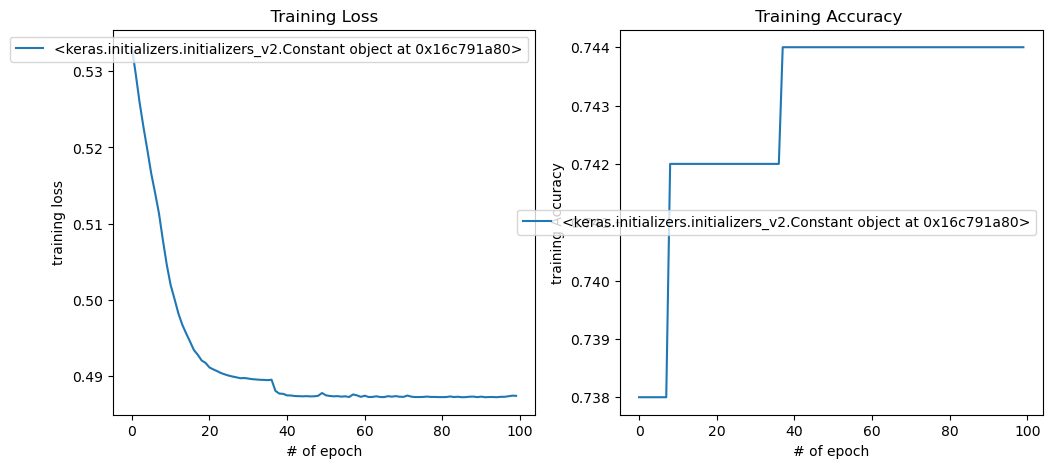

In [241]:
#,tf.keras.initializers.Constant( 1,)
plt.figure(figsize=(12,5))
activation = 'relu'
initialization = [tf.keras.initializers.Constant(3)]#, tf.keras.initializers.Constant(3),tf.keras.initializers.HeUniform(seed=2)]##, tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=2),
##tf.keras.initializers.HeUniform(seed=2), tf.keras.initializers.GlorotUniform(seed=2)] 

#initialization = [tf.keras.initializers.Zeros(), tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=2),
#tf.keras.initializers.HeUniform(seed=2), tf.keras.initializers.GlorotUniform(seed=2)] 
for ini in initialization:
    history, result, model = evaluate_model(trainX, trainy, testX, testy, activation, ini)
    # plot learning curve 

    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label = ini)
    plt.xlabel('# of epoch')
    plt.ylabel('training loss')
    plt.title('  Training Loss  ')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label = ini)
    plt.xlabel('# of epoch')
    plt.ylabel('training Accuracy')
    plt.title(' Training Accuracy  ')
    plt.legend()

<keras.initializers.initializers_v2.Zeros object at 0x169f11e40> - Train Accuracy: (0.5080000162124634, 0.6930191516876221)
layer-0/kernel:0, shape: (2, 5)
layer-0/bias:0, shape: (5,)
layer-1/kernel:0, shape: (5, 5)
layer-1/bias:0, shape: (5,)
layer-2/kernel:0, shape: (5, 2)
layer-2/bias:0, shape: (2,)


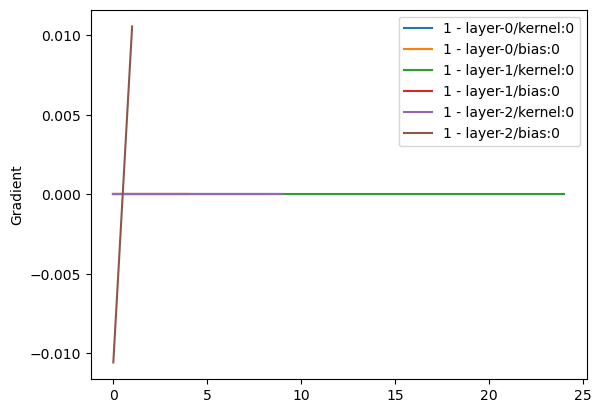

In [240]:
#num_layers = [3,10]
num_layers = [1]
activation = 'relu'
for n_layers in num_layers:
  history, result, model = evaluate_model(trainX, trainy, testX, testy, activation, tf.keras.initializers.Zeros())
  with tf.GradientTape() as tape:
      pred = model(trainX)
      loss = tf.keras.losses.categorical_crossentropy(trainy, pred)
      grads = tape.gradient(loss, model.trainable_variables)

  # plot learning curve
  plt.figure()
  for var, g in zip(model.trainable_variables, grads):
      print(f'{var.name}, shape: {g.shape}')    
      #if 'layer-0/kernel' in var.name:
      plt.plot(g.numpy().flatten(), label=str(n_layers) +' - ' + str(var.name))
      plt.ylabel('Gradient')
      #plt.xlabel('Flattened weights')
        
plt.legend()
plt.show()

<keras.initializers.initializers_v2.Constant object at 0x16afd7e20> - Train Accuracy: (0.7979999780654907, 0.45355820655822754)
layer-0/kernel:0, shape: (2, 5)
layer-0/bias:0, shape: (5,)
layer-1/kernel:0, shape: (5, 5)
layer-1/bias:0, shape: (5,)
layer-2/kernel:0, shape: (5, 2)
layer-2/bias:0, shape: (2,)


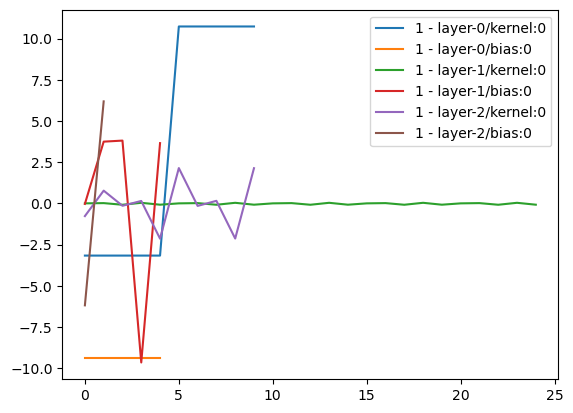

In [239]:
#num_layers = [3,10]
num_layers = [1]
activation = 'relu'
for n_layers in num_layers:
  history, result, model = evaluate_model(trainX, trainy, testX, testy, activation, tf.keras.initializers.Constant(1))
  with tf.GradientTape() as tape:
      pred = model(trainX)
      loss = tf.keras.losses.categorical_crossentropy(trainy, pred)
      grads = tape.gradient(loss, model.trainable_variables)

  # plot learning curve
  plt.figure()
  for var, g in zip(model.trainable_variables, grads):
      print(f'{var.name}, shape: {g.shape}')    
      #if 'layer-0/kernel' in var.name:
      plt.plot(g.numpy().flatten(), label=str(n_layers) +' - ' + str(var.name))
        
plt.legend()
plt.show()